A partir del juego de datos disponible en el siguiente enlace http://archive.ics.uci.edu/ml/datasets/adult, realiza las tareas previas a la generación de un modelo de minería de datos.

In [1]:
#Importo las librerias que voy a utilizar 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargo los datos del Dataset (Predict whether income exceeds $50K/yr based on census data)
data = pd.read_csv("adult.csv")

#Imprimo los nombres de las columnas del Dataset
print('Las columnas del Dataset son:\n', data.columns)

#Descripcion variables: 
#age: La edad del individuo. 
#workclass: Relacion laboral del individuo: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
#fnlwgt: continuous. 
#education: El mayor nivel de estudio que alcanzo el individuo: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
#education-num: continuous. 
#marital-status: El estado civil del individuo: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
#occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
#relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
#sex: Female, Male. 
#capital-gain: Ganancia del individuo. continuous. 
#capital-loss: Perdida del individuo. continuous. 
#hours-per-week: Cantidad de horas a la semana que el individuo trabaja. continuous. 
#native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#Cantidad de instancias (filas) y de caracteristicas (columnas) del dataset
print('\nEl dataset tiene: ',data.shape[0], 'filas y', data.shape[1], 'columnas')

#Verifico que los tipos de variables de cada columna
print('\nTipo de dato de cada columna:\n',data.dtypes)

data.head()

Las columnas del Dataset son:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

El dataset tiene:  32561 filas y 15 columnas

Tipo de dato de cada columna:
 age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
#Descripcion estadistica de las variables: 
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#Valores vacios, estan identificados con el signo de interrogación ?
print('\nCantidad de valores vacíos por columna:\n',data.isin(['?']).sum(axis=0))

#Asigno el valor 'Desconocido' para los valores vacios de 'workclass', 'occupation' y 'native.country'
data['workclass'] = data['workclass'].replace('?','Desconocido')
data['occupation'] = data['occupation'].replace('?','Desconocido')
data['native.country'] = data['native.country'].replace('?','Desconocido')

#Vuelvo a chequear valores vacios
print('\nCantidad de valores vacíos por columna luego de la modificación:\n',data.isin(['?']).sum(axis=0))


Cantidad de valores vacíos por columna:
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Cantidad de valores vacíos por columna luego de la modificación:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


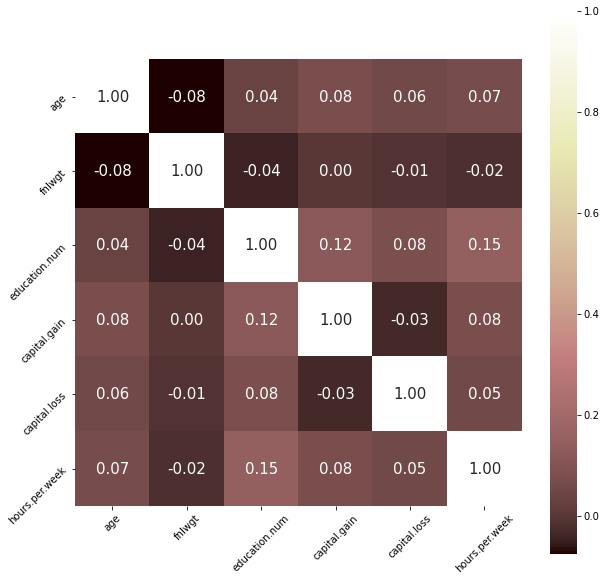

In [5]:
##Analisis exploratorio de datos

#Heatmap para ver la correlacion entre las variables del dataset

#Elimino las variables no numericas
corr = data.drop(columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.drop(columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']).columns, 
           yticklabels= data.drop(columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']).columns,
           cmap= 'pink')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

No hay alta relacion entre las variables por lo que de antemano no puedo eliminar ninguna. 

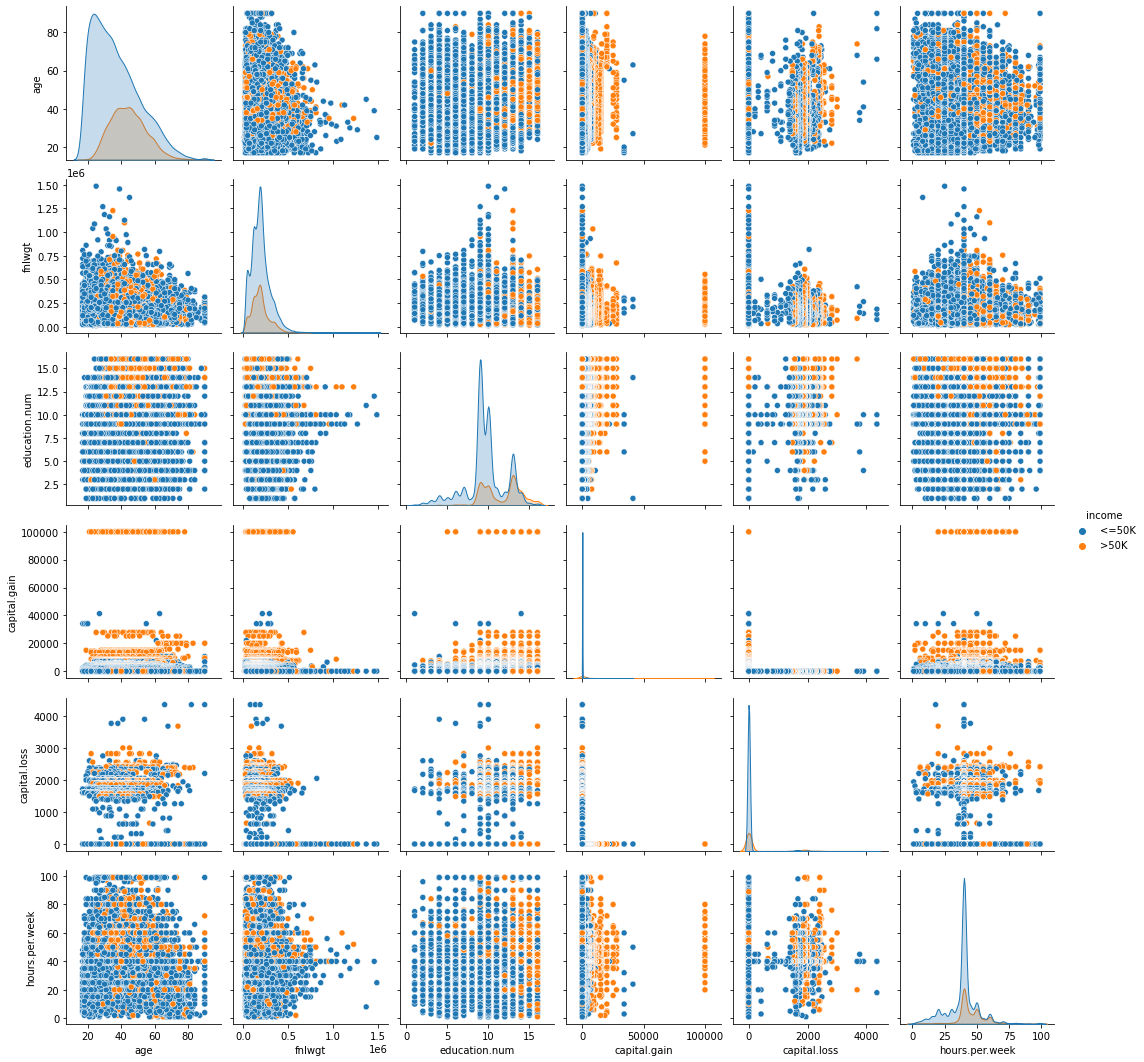

In [6]:
#Realizo un pairplot para ver de forma gráfica la relacion entre todas las variables del dataset

sns.pairplot(data, hue = 'income')
plt.show()

Al igual que con el heatmap, a partir del pairplot no se ve alta dependencia entre las variables numericas, por lo que de antemano no podemos definir eliminar ninguna

Cantidad de individuos con ingresos mayores a 50K: 7841 
Cantidad de individuos con ingresos menores a 50K: 24720


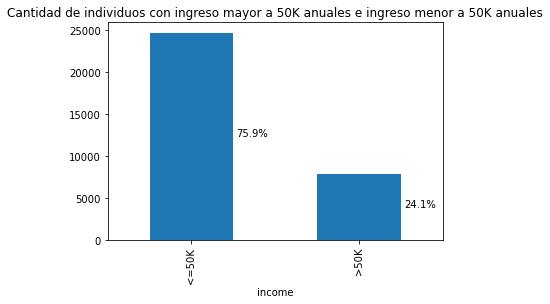

In [7]:
#Cantidad de individuos que tienen un ingreso mayor a 50K anuales y los que tienen un ingreso menor. 

total_mayor = data[data['income'] == '>50K'].count()[0]
total_menor = data[data['income'] == '<=50K'].count()[0]

print('Cantidad de individuos con ingresos mayores a 50K:', total_mayor,'\nCantidad de individuos con ingresos menores a 50K:', total_menor)

a = data.groupby(["income"]).size().plot(kind = 'bar')

total = len(data['income'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))     
        
plt.title('Cantidad de individuos con ingreso mayor a 50K anuales e ingreso menor a 50K anuales')

plt.show()

Como podemos observar en el grafico de barras de arriba, el dataset esta conformado por un 75,9% de personas con ingresos inferiores a 50K anuales, y un 24,1% de personas que superan ese ingreso. 
Es decir que el dataset esta desbalanceado para la variable target que queremos predecir (income)

Cantidad mujeres: 10771 Cantidad hombres: 21790


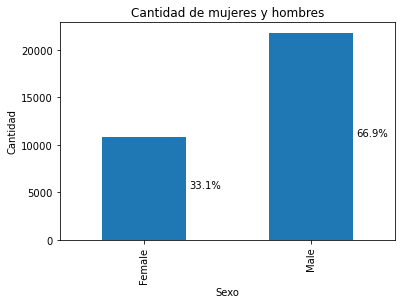

In [8]:
#Cantidad de hombres y mujeres en el dataset

total_fem = data[data['sex'] == 'Female'].count()[0]
total_male = data[data['sex'] == 'Male'].count()[0]

print('Cantidad mujeres:', total_fem,'Cantidad hombres:', total_male)

ax = data.groupby(["sex"]).size().plot(kind = 'bar')

total = len(data['sex'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.xticks(rotation=90)
plt.title('Cantidad de mujeres y hombres')
plt.ylabel('Cantidad')
plt.xlabel('Sexo')
plt.show()

Podemos observar que el dataset esta formado por casi el 67% de hombres y un 33% de mujeres.
Es decir hay casi el doble de hombres que de mujeres

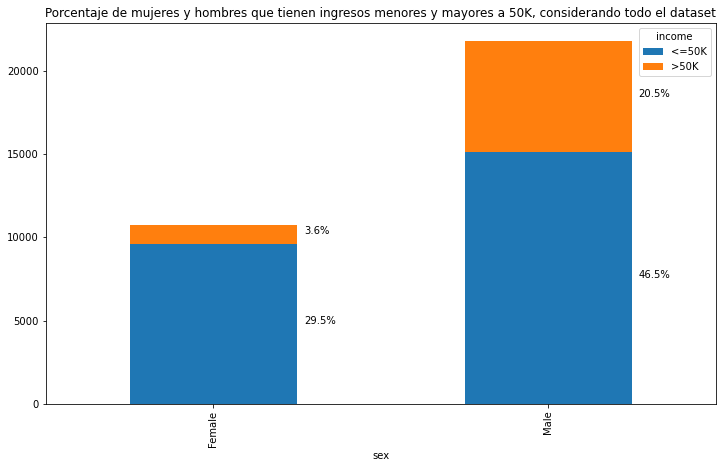

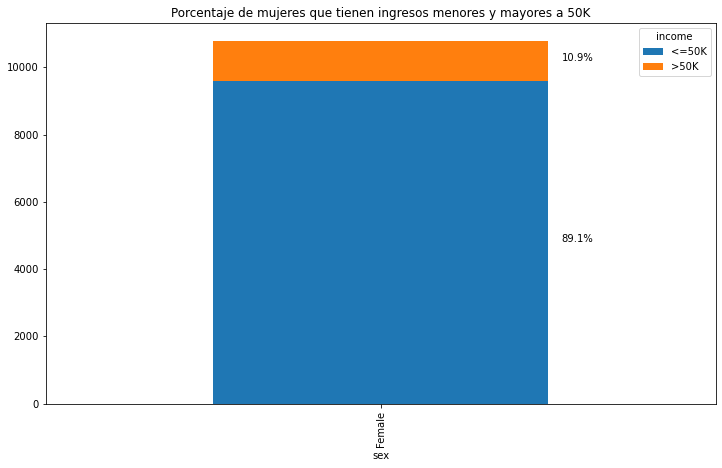

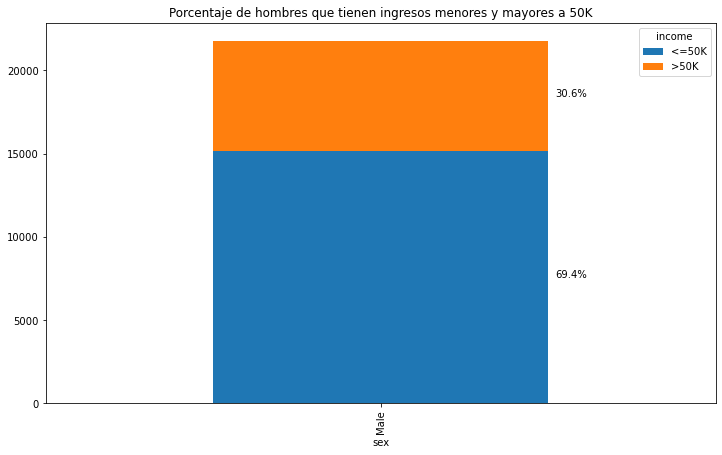

In [9]:
#Grafico del ingreso >50k <=50K diferenciado entre hombres y mujeres.

ax = data.groupby(["sex", data.income]).size().unstack(level = 1).plot(kind = 'bar',stacked=True, figsize = (12,7))

total = len(data['workclass'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Porcentaje de mujeres y hombres que tienen ingresos menores y mayores a 50K, considerando todo el dataset')
plt.show()

ax1 = data[data['sex'] == 'Female'].groupby(["sex", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))

for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_fem)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
plt.title('Porcentaje de mujeres que tienen ingresos menores y mayores a 50K')
ax2 = data[data['sex'] == 'Male'].groupby(["sex", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))

for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total_male)
        x = p.get_x() + p.get_width() + 0.01
        y = p.get_y() + p.get_height()/2
        ax2.annotate(percentage, (x, y))

plt.title('Porcentaje de hombres que tienen ingresos menores y mayores a 50K')
plt.show()

Tomando todo el conjunto de datos, las mujeres que tienen un ingreso mayor a 50K anuales representan el 3,6% del total del data set y los hombres, representan un 20,5%.  
Si tomamos solo a las mujeres, como se muestra en el segundo grafico, el 10,9% tiene un ingreso superior al 50K anuales y tomando solo a los hombres, tercer grafico, hay un 30,6% que tienen un ingreso superior a 50K anuales.

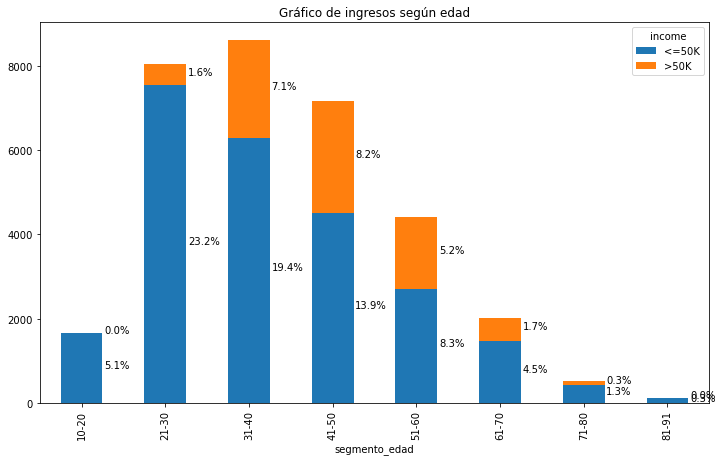

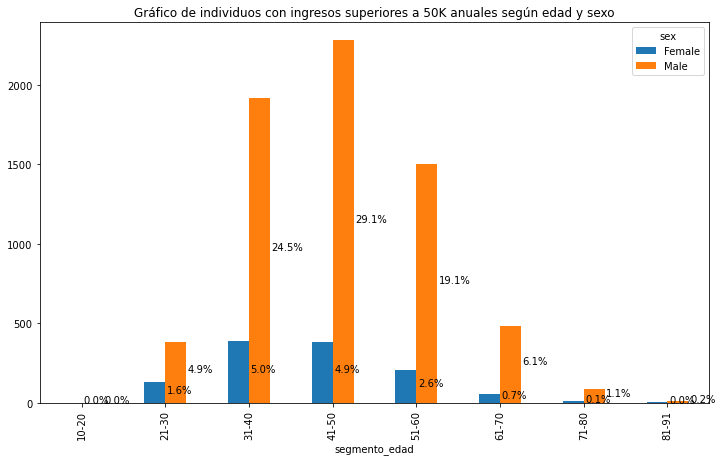

In [10]:
#Agrego un campo nuevo a los datos: valor de la edad discretizada con un metodo de intervalos de igual amplitud

bins= [10,20,30,40,50,60,70,80,91]
rango = ["10-20", "21-30", "31-40", "41-50","51-60","61-70","71-80","81-91"]
data['segmento_edad'] = pd.cut(data['age'], bins=bins, labels=rango, right=False)
ax = data.groupby(["segmento_edad", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
total = len(data['workclass'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de ingresos según edad')
plt.show()

ax = data[data.income == '>50K']
ax = ax.groupby(['sex', 'segmento_edad']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data[data.income == '>50K']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de individuos con ingresos superiores a 50K anuales según edad y sexo')
plt.show()

Del primer gráfico podemos decir que el mayor porcentaje de personas que ganan más de 50K anuales se encuentra dentro
del rango de edad 41-50 años, seguido por el de 31-40 años y 51-60 años. 
El resto de los grupos tienen un porcentaje muy bajo de ingresos mayores a 50K. El grupo de 17-20 y 81-91 años no tienen este ingreso.
Por otro lado, en el segundo gráfico, vemos sólo los datos de los que ganan más de 50K, separados por género y por rango de edad. 
Vemos que en el rango de 41-50 años, que es el mayoritario, los hombres representan el 29,1%, y las mujeres solo el 4,9%.
El segundo grupo, el de 31-40 años, está representado por un 24,5% de hombres y un 5% de mujeres, y el tercer grupo, 51-60 años, esta formado por  un 19,1% de hombres y un 2,6% de mujeres. 
En conclusion, el género influye en el target que queremos predecir (income). 

['Desconocido' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']


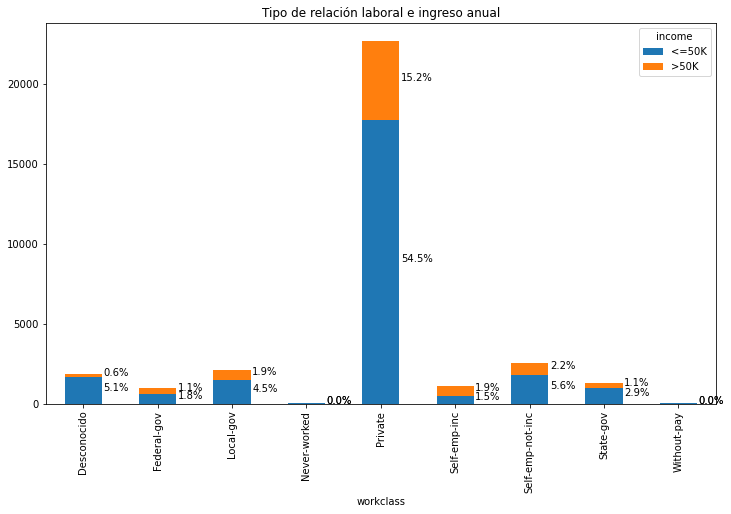

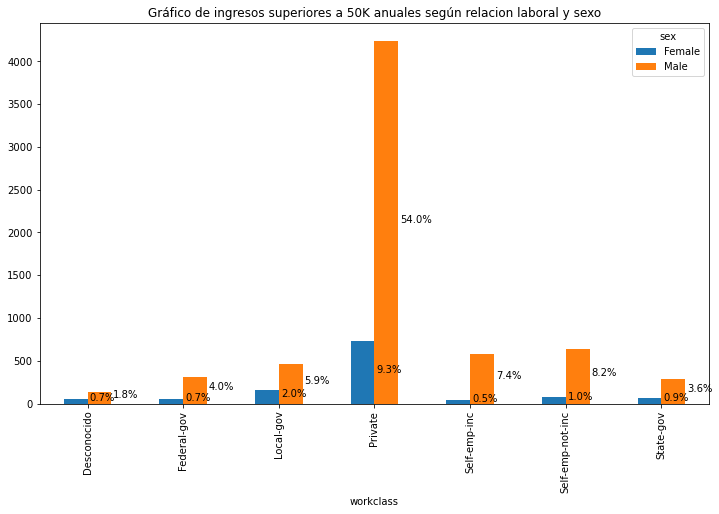

In [11]:
#Variable Workclass

print(data.workclass.unique())

ax = data.groupby(["workclass", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
total = len(data['workclass'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Tipo de relación laboral e ingreso anual')
plt.show()

ax = data[data.income == '>50K']
ax = ax.groupby(['sex', 'workclass']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data[data.income == '>50K']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de ingresos superiores a 50K anuales según relacion laboral y sexo')
plt.show()

La mayoria de los individuos del data set trabajan de forma privada (69,7%), de los cuales el 15,2% tienen una ganancia superior a 50K anuales. 
El porcentaje de personas que ganan mas de 50K anuales del resto de los grupos es mucho menor. 
En el segundo grafico, observamos que, tomando solo a los individuos que ganan más de 50k, el 54% son hombres y pertenecen al grupo de relacion laboral Privada, seguido por las mujeres de ese grupo que representan un 9,3%. 
Es decir que hay una tendencia a que los individuos hombres que trabajan en el ámbito privado tienen más probabilidad de ganar más de 50K anuales, igualmente hay que tener presente que hay un desbalance en el dataset en referencia a la cantidad de hombres y mujeres, siendo la del primero grupo del doble. 

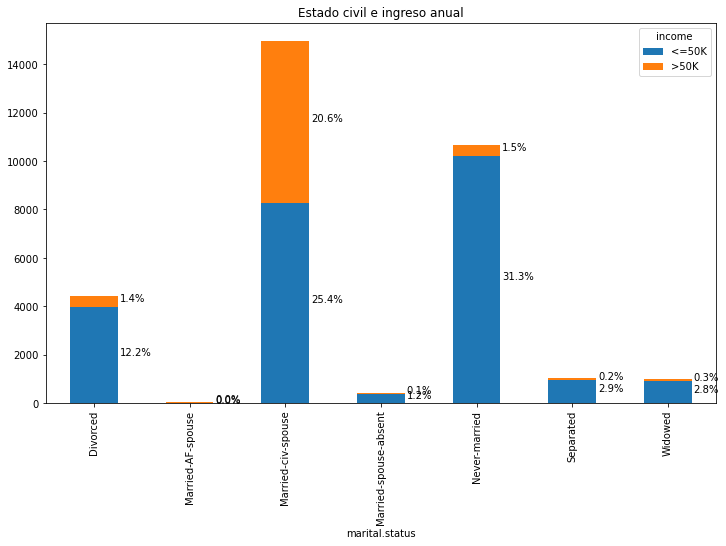

In [12]:
#Variable Marital Status

ax2 = data.groupby(["marital.status", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
total = len(data['workclass'])

for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax2.annotate(percentage, (x, y))
        
plt.title('Estado civil e ingreso anual')
plt.show()


Del grafico podemos decir que el estado civil que predomina en el data set es el de Casados: Married-cv-spouse, con un 46%, y dentro del cual se encuentra el mayor porcentaje de personas que tienen un ingreso superior a 50K anuales, siendo del 20,6% de ese 46%.
El grupo siguiente es el de los que nunca han estado casados, representando el 32,8% del total, pero solo un 1,5% de este grupo tiene un ingreso superior a 50K. 

income             <=50K  >50K
occupation                    
Adm-clerical        3263   507
Armed-Forces           8     1
Craft-repair        3170   929
Desconocido         1652   191
Exec-managerial     2098  1968
Farming-fishing      879   115
Handlers-cleaners   1284    86
Machine-op-inspct   1752   250
Other-service       3158   137
Priv-house-serv      148     1
Prof-specialty      2281  1859
Protective-serv      438   211
Sales               2667   983
Tech-support         645   283
Transport-moving    1277   320


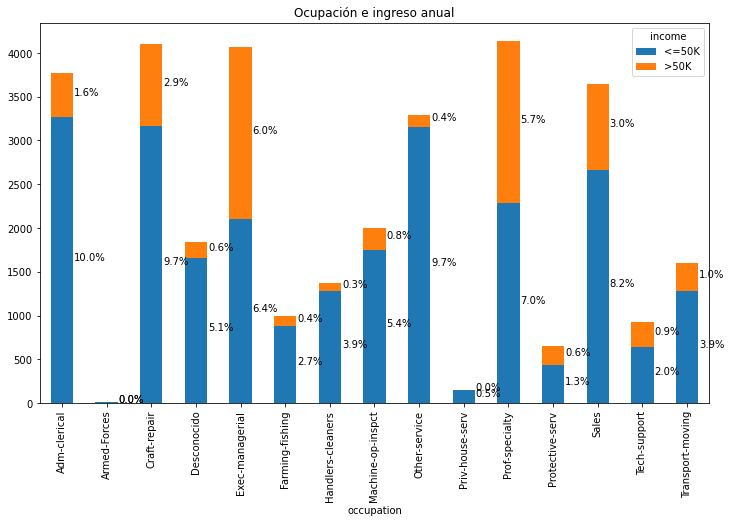

In [13]:
#Variable Ocupacion 

ax = data.groupby(["occupation", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
print(data.groupby(["occupation", data.income]).size().unstack(level = 1))
total = len(data['occupation'])

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.title('Ocupación e ingreso anual')
plt.show()

 En cuanto a las ocupaciones, podemos ver que el grupo mayoritario (6% del total del dataset) con ganancias superiores a 50K pertenecen al grupo de Exec-Managerial que serian ejecutivos de puestos gerenciales. Luego le sigue, con un 5,7%, el grupo de Prof-Specialty que serian los profesionales y especialistas. Luego, casi con el mismo porcentaje están los que se dedican a ventas y los que se dedican a reparaciones (craft-Repair)

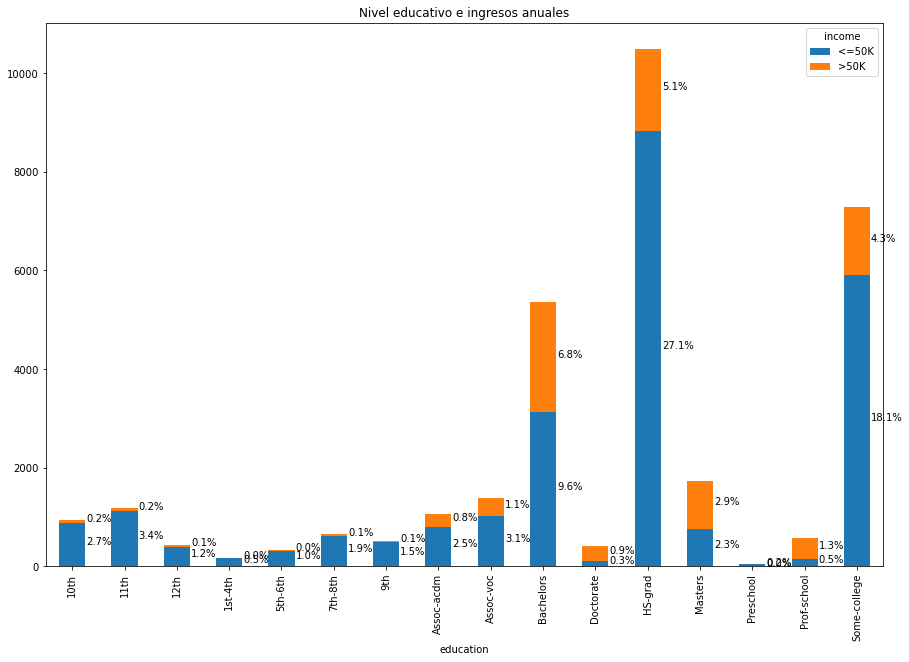

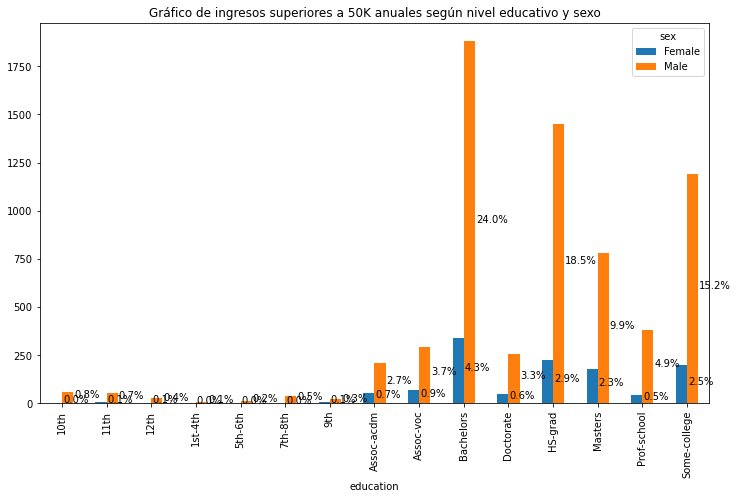

In [14]:
#Nivel educativo vs ingreso
ax = data.groupby(["education", data.income]).size().unstack(level = 1).plot(kind = 'bar', figsize = (15,10), stacked=True)
plt.title('Nivel educativo e ingresos anuales')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

        
#Nivel educativo de los que tienen ingreso superior a 50K, separado por sexo
ax = data[data.income == '>50K']
ax = ax.groupby(['sex', 'education']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data[data.income == '>50K']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de ingresos superiores a 50K anuales según nivel educativo y sexo')
plt.show()

Con respecto al análisis del nivel educativo, podemos decir que un 32% de los individuos del dataset han finalizado la secundaria (HS-grad), dentro de este grupo un 5,1% tienen un ingreso superior a 50K, seguido por un 22,4% de individuos que han llegado al nivel de College y dentro del cual un 4,3% tienen ingresos superiores a 50K. Luego sigue el grupo representado por el 16,4% que han alcanzado nivel Bachelors, dentor de los cuales un 6,8% recibe ganancias superiores a 50K. 
En el segundo gráfico nos quedamos solo con los individuos que tienen ganancias superiores a 50K, separados por nivel educativo alcanzado. El grupo predominante con ganancias mayores a 50K es el que ha alcanzado el nivel Bachelors, seguido por los HS-grad y luego los de College, tambien vemos que los que han alcanzado nivel Master y Prof-School, tienen un porcentaje de individuos con ganancias superiores a 50K.
En todos los grupos se ve que la cantidad de hombres supera a la de mujeres para el mismo nivel educativo, lo cual puede tambien deberse a que el dataset esta formado por el doble de hombres que de mujeres. 

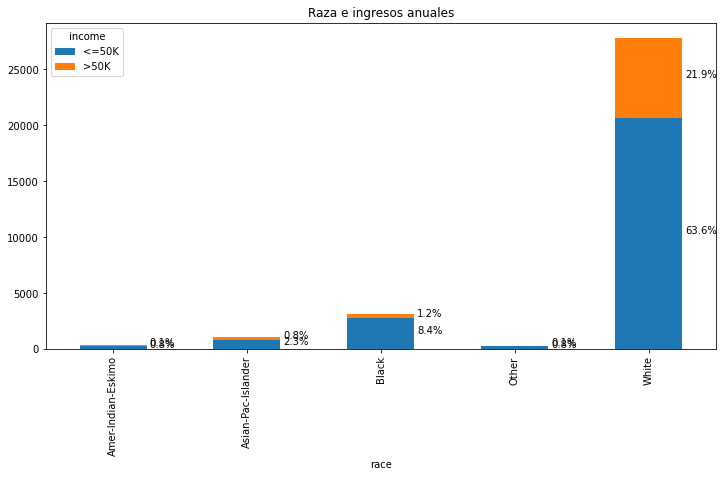

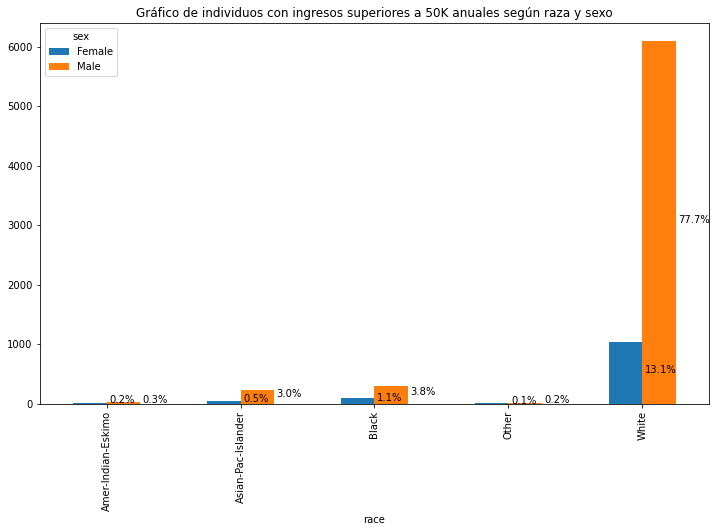

In [15]:
#Variable Race vs Ingreso 
ax = data.groupby(["race", data.income]).size().unstack(level = 1).plot(kind = 'bar', figsize = (12,6), stacked=True)
plt.title('Raza e ingresos anuales')
total = len(data['race'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show() 
        
#Variable race de los que tienen ingreso superior a 50K, separado por sexo
ax = data[data.income == '>50K']
ax = ax.groupby(['sex', 'race']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data[data.income == '>50K']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de individuos con ingresos superiores a 50K anuales según raza y sexo')
plt.show()        

En este dataset, filtrando por la variable race, el grupo de mayor porcentaje es el de personas blancas, formado por el 75,4% del total. Dentro del cual un 21,9% de personas tienen un ingreso superior a 50K anuales.
En cuanto al resto de los grupos, el que le sigue en porcentaje es raza negra que representan el 9,6% del total, con solo un 1.2 % de individuos con ingresos mayores a 50K.
En el segundo grafico, vemos unicamente a los individuos con ganancias superiores a 50K, separados por raza y genero, del grupo predominante, raza blanca, el 77,7% representa a hombres y el 13,1% a mujeres, del grupo que sigue, raza negra, el 3,8% representa a hombres y el 1,1% a mujeres. 

Variable Hours per week: count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


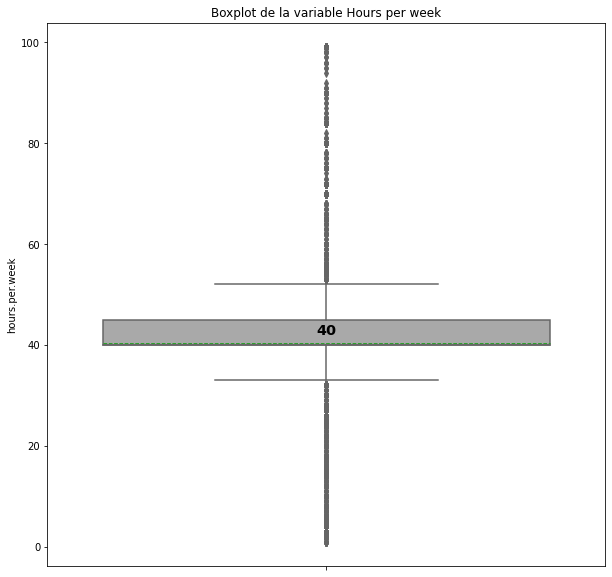

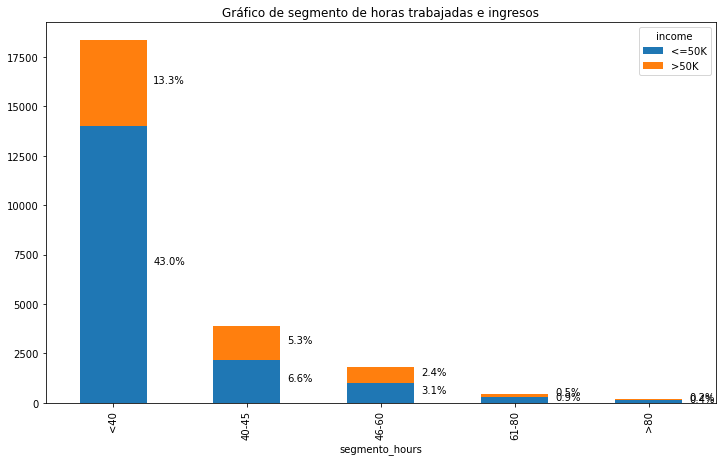

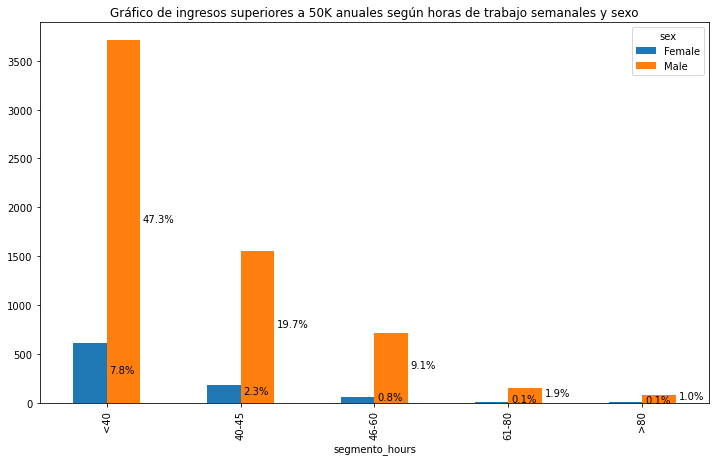

In [16]:
#Variable Hours per Week
print('Variable Hours per week:',data['hours.per.week'].describe())

#Grafico tipo boxplot para ver la distribucion de la variable
plt.figure(figsize = (10,10))
box_plot = sns.boxplot(y = data['hours.per.week'], showmeans=True, meanline=True, color = 'darkgray')
plt.title('Boxplot de la variable Hours per week')

mean = int(data['hours.per.week'].mean())
vertical_offset = data['hours.per.week'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,mean + vertical_offset,mean, 
            horizontalalignment='center',size='x-small',color='black',weight='semibold', fontsize = 'x-large')

#Discretizo la variable en 5 grupos:

#los que trabajan menos de 40 horas semanales 
#los que trabajan entre 40 y 45 horas semanales 
#los que trabajan entre 45 y 60 hotas semanales. 
#los que trabajan entre 60 y 80 horas semanales
#los que trabajan mas de 80 horas semanales

bins1= [40, 50, 60, 70, 80, 90]
rango1 = ["<40", "40-45", "46-60", "61-80",">80"]
data['segmento_hours'] = pd.cut(data['hours.per.week'], bins=bins1, labels=rango1, right=False)
ax = data.groupby(["segmento_hours", data.income]).size().unstack(level = 1).plot(kind = 'bar', stacked=True, figsize = (12,7))
total = len(data['workclass'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.title('Gráfico de segmento de horas trabajadas e ingresos')
plt.show()

#Horas semanales trabajadas de los que tienen ingreso superior a 50K, separado por sexo
ax = data[data.income == '>50K']
ax = ax.groupby(['sex', 'segmento_hours']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data[data.income == '>50K']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico de ingresos superiores a 50K anuales según horas de trabajo semanales y sexo')
plt.show()

En el plot box de la variable horas por semana podemos ver que la media de horas trabajadas esta en 40 horas. 
Luego, el cuartil 25 (valor por debajo del cual se encuentra el 25% de la poblacion) esta en 40 horas.
El cuartil 75, valor por encima del cual esta el 25% restante, se encuentra aproximadamente en 45 horas.
Se ve un valor maximo en aproximadamente 50 horas, y un valor minimo en aproximadamente 30 horas. 
Los puntos negros a cada lado de los cuartiles representan los outliers, que serian puntos que no estan dentro del espacio intercuartil. 

En el segundo grafico, observamos que el 56% de los individuos trabajan menos de 40 horas semanales, dentro de este grupo un 13,3% son los que tienen ingresos superiores a 50K anuales, el grupo que le sigue representa el 12% de individuos del dataset que trabajan en el rango de 40-45 horas, dentro del cual solo el 5,3% reciben un ingreso mayor a 50K anuales. 

En el tercer gráfico analizamos unicamente a los que tienen ingreso superior a 50K segun el rango de horas semanales que trabajan y su género. Vemos que en el grupo predominante de los que trabajan menos de 40 horas semanales, un 47,3% esta formado por hombres y un 7,8 % por mujeres. En los grupos siguientes tambien se observa el porcentaje superior de hombres que mujeres, siendo en el grupo de 40-45 horas: 19,7% hombres y 2,3% mujeres, y en el grupo de 46-60 horas, 9,1% hombres y 0,8% mujeres. 

Variable capital gain: count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

Variable capital loss: count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64
2712
1519


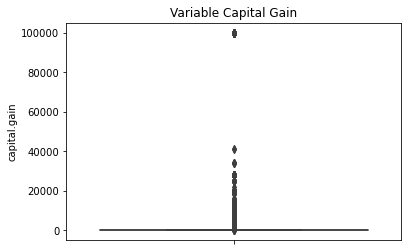

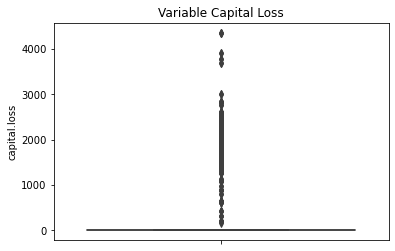

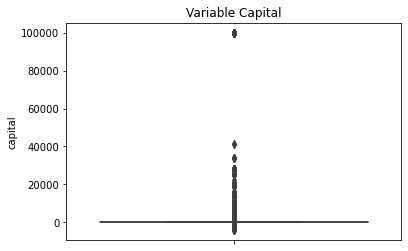


Variable capital: count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital, dtype: float64


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,segmento_edad,segmento_hours,capital
0,90,Desconocido,77053,HS-grad,9,Widowed,Desconocido,Not-in-family,White,Female,0,4356,40,United-States,<=50K,81-91,<40,-4356
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,81-91,NaN,-4356
2,66,Desconocido,186061,Some-college,10,Widowed,Desconocido,Unmarried,Black,Female,0,4356,40,United-States,<=50K,61-70,<40,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-60,<40,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,41-50,<40,-3900


In [19]:
#Variable Capital gain y capital loss
print('Variable capital gain:',data['capital.gain'].describe())
print('\nVariable capital loss:',data['capital.loss'].describe())
print((data['capital.gain'][data['capital.gain'] != 0]).count())
print((data['capital.loss'][data['capital.loss'] != 0]).count())

sns.boxplot(y = data['capital.gain'])
plt.title('Variable Capital Gain')
plt.show()
sns.boxplot(y = data['capital.loss'])
plt.title('Variable Capital Loss')
plt.show()

#Creo una nueva variable Capital formada por la diferencia entre ganancia y perdida 

data['capital'] = data['capital.gain']-data['capital.loss']

sns.boxplot(y = data['capital'])
plt.title('Variable Capital')
plt.show()
print('\nVariable capital:',data['capital'].describe())
data.head()

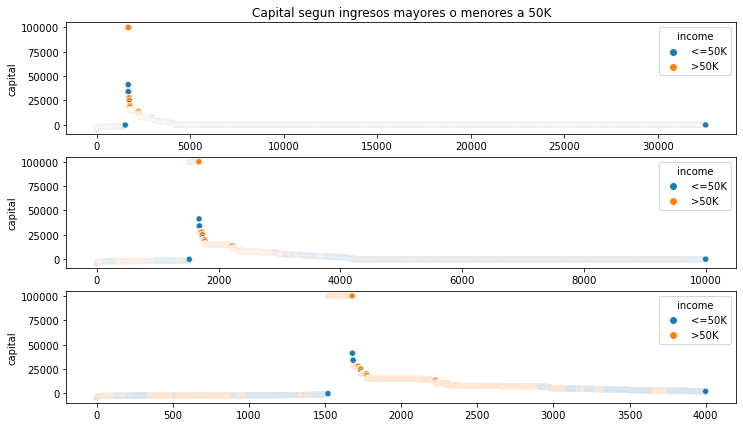

La cantidad de ceros en esta variable es: 28330


In [20]:

plt.figure( figsize = (12,7))
plt.subplot(3,1,1)
sns.scatterplot(x = np.linspace(0,len(data['capital']), len(data['capital'])), y = data['capital'], hue = data['income'])
plt.title('Capital segun ingresos mayores o menores a 50K')
d1 = data[:10000]
plt.subplot(3,1,2)
sns.scatterplot(x = np.linspace(0,10000, 10000), y = d1['capital'], hue = d1['income'])
d = data[:4000]
plt.subplot(3,1,3)
sns.scatterplot(x = np.linspace(0,4000, 4000), y = d['capital'], hue = d['income'])
plt.show()

print('La cantidad de ceros en esta variable es:',(data['capital'][data['capital'] == 0]).count())


Considerando que 28330 tienen valor 0 en esta variable podemos prescindir de ella.


Variable nativa country: ['United-States' 'Desconocido' 'Mexico' 'Greece' 'Vietnam' 'China'
 'Taiwan' 'India' 'Philippines' 'Trinadad&Tobago' 'Canada' 'South'
 'Holand-Netherlands' 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany'
 'Italy' 'Japan' 'Hong' 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru'
 'Nicaragua' 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary'
 'Columbia' 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia'
 'Scotland' 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']
native.country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Desconocido                     583
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala   

<ipython-input-21-9697817ad5c0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['country'][i] = 'USA'
/Users/eugeniabezek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-9697817ad5c0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['country'][i] = 'Other'



Nueva variable country, puede tomar los valores
: ['USA' 'Other']

La cantidad de cada uno es
: country
Other     3391
USA      29170
dtype: int64


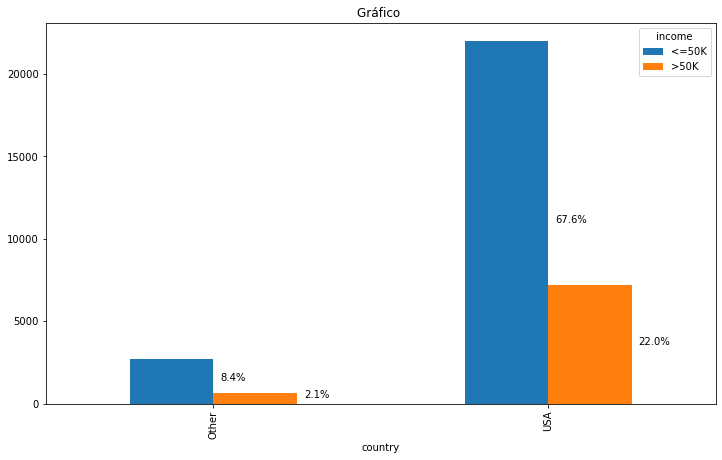

In [21]:
#Variable Native Country

print('\nVariable nativa country:', data['native.country'].unique())
print(data.groupby('native.country').size())

#Creo una nueva variable que separe las personas nacidas en Estados Unidos (que son la mayoria) del resto.

def my_function(dataset):
    
    for i in range(len(dataset)):
        if dataset['native.country'][i] == 'United-States':
            dataset['country'][i] = 'USA'
        else:
            dataset['country'][i] = 'Other'    
    return dataset

data['country'] = np.zeros(len(data)) 
my_function(data)

print('\nNueva variable country, puede tomar los valores\n:', data['country'].unique())
print('\nLa cantidad de cada uno es\n:',data.groupby('country').size())

#Grafico la nueva variable country segun ingresos
ax = data.groupby(['income', 'country']).size().unstack(level = 0).plot(kind = 'bar', figsize = (12,7))
total = (data['country']).shape[0]
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title('Gráfico ')
plt.show()

In [ ]:
## Conclusiones finales
Luego del procesamiento, los datos han quedado sin variables faltantes. El dataset dispone de la variable 'Income', 
que puede utilizarse como variable predictora en un modelo de clasificacion. 
Analizando los diferentes gráficos pude observar que hay una tendencia a que el grupo con mas tendencia a tener ganancias
superiores a 50K este formado por individuos blancos con trabajos privados, tambien hay una tendencia a esto segun 
su estado civil, su nivel educativo y su ocupacion.
Por otro lado, en todos los casos vemos que hay una predominancia de hombres con mayor ingreso que mujeres, pero 
para determinar esto hay que tener en cuenta que el data set esta formado por el doble de individuos masculinos que femeninos, 
por lo cual esta desbalanceado para tomar esta variable como unica clasificadora. 

Dicho todo esto las variables que primero probaría para ingresar al modelo de prediccion serian: 
    - sex
    - workclass (habria que convertirla a una variable numerica)
    - education num (que seria la variable education pero numerica)
    - race (habria que convertirla a una variable numerica)
    - marital status (habria que convertirla a una variable numerica)
    - segmento_horas

In [22]:
#Convierto la variable sex a numerica 
data['sex'] = data['sex'].map({'Female' : 0, 'Male': 1})

#Convierto la variable workclass a numerica a traves del metodo get dummies de pandas 
workclass_dummies = pd.get_dummies(data['workclass'])
data = data.join(workclass_dummies)

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,country,Desconocido,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,90,Desconocido,77053,HS-grad,9,Widowed,Desconocido,Not-in-family,White,0,...,USA,1,0,0,0,0,0,0,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,...,USA,0,0,0,0,1,0,0,0,0
2,66,Desconocido,186061,Some-college,10,Widowed,Desconocido,Unmarried,Black,0,...,USA,1,0,0,0,0,0,0,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,...,USA,0,0,0,0,1,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,...,USA,0,0,0,0,1,0,0,0,0


In [23]:
#Convierto variable race a numerica 
race_dummies = pd.get_dummies(data['race'])
data = data.join(race_dummies)

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,90,Desconocido,77053,HS-grad,9,Widowed,Desconocido,Not-in-family,White,0,...,0,0,0,0,0,0,0,0,0,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,...,1,0,0,0,0,0,0,0,0,1
2,66,Desconocido,186061,Some-college,10,Widowed,Desconocido,Unmarried,Black,0,...,0,0,0,0,0,0,0,1,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,...,1,0,0,0,0,0,0,0,0,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,...,1,0,0,0,0,0,0,0,0,1


In [24]:
#Convierto variable marital status a numerica 
marital_dummies = pd.get_dummies(data['marital.status'])
data = data.join(marital_dummies)

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,Black,Other,White,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,90,Desconocido,77053,HS-grad,9,Widowed,Desconocido,Not-in-family,White,0,...,0,0,1,0,0,0,0,0,0,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,...,0,0,1,0,0,0,0,0,0,1
2,66,Desconocido,186061,Some-college,10,Widowed,Desconocido,Unmarried,Black,0,...,1,0,0,0,0,0,0,0,0,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,...,0,0,1,1,0,0,0,0,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'segmento_edad', 'segmento_hours', 'capital', 'country',
       'Desconocido', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
       'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object')

In [26]:
#Borro las columnas que considero innecesarias para el modelo. 
X = data.drop(columns = ['workclass', 'fnlwgt', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'capital.gain', 'capital.loss', 
               'capital', 'segmento_hours','segmento_edad', 'native.country', 'income', 'country'], axis = 1)
y = data['income']

print(X.shape)
X.columns

(32561, 25)


Index(['age', 'education.num', 'sex', 'hours.per.week', 'Desconocido',
       'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed'],
      dtype='object')

In [27]:
X.describe()

,age,education.num,sex,hours.per.week,Desconocido,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Black,Other,White,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,0.669205,40.437456,0.056386,0.029483,0.064279,0.000215,0.697030,0.034274,...,0.095943,0.008323,0.854274,0.136452,0.000706,0.459937,0.012837,0.328092,0.031479,0.030497
std,13.640433,2.572720,0.470506,12.347429,0.230670,0.169159,0.245254,0.014661,0.459549,0.181935,...,0.294518,0.090851,0.352837,0.343273,0.026569,0.498400,0.112575,0.469526,0.174612,0.171952
min,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#Normalizo los datos con Standard Scaler de Sickit Learn, para establecer una escala equivalente para todos los datos. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Aplico a los datos la transformacion StandatScaler que remueve la media y escala los datos para quetengan varianza 1. 
X_new = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_new, columns = ['age', 'education.num', 'sex', 'hours.per.week', 'Desconocido',
       'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Divorced',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed'])


X_scaled.describe()

,age,education.num,sex,hours.per.week,Desconocido,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,...,Black,Other,White,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,...,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,1.150437e-15,4.055804e-17,-6.037859e-15,-3.437842e-15,3.592702e-16,7.386933e-16,4.581084e-15,-2.941687e-15,-6.744261e-16,-5.923559e-15,...,4.408913e-15,-4.769442e-15,-1.036020e-14,3.027140e-16,-3.857380e-16,-1.057878e-14,2.506772e-15,-4.751452e-15,2.189904e-15,1.070637e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.582206e+00,-3.529656e+00,-1.422331e+00,-3.194030e+00,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,-1.516792e+00,-1.883893e-01,...,-3.257682e-01,-9.161163e-02,-2.421192e+00,-3.975081e-01,-2.658695e-02,-9.228407e-01,-1.140368e-01,-6.987838e-01,-1.802846e-01,-1.773581e-01
25%,-7.757679e-01,-4.200596e-01,-1.422331e+00,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,-1.516792e+00,-1.883893e-01,...,-3.257682e-01,-9.161163e-02,4.130197e-01,-3.975081e-01,-2.658695e-02,-9.228407e-01,-1.140368e-01,-6.987838e-01,-1.802846e-01,-1.773581e-01
50%,-1.159546e-01,-3.136003e-02,7.030713e-01,-3.542945e-02,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,6.592860e-01,-1.883893e-01,...,-3.257682e-01,-9.161163e-02,4.130197e-01,-3.975081e-01,-2.658695e-02,-9.228407e-01,-1.140368e-01,-6.987838e-01,-1.802846e-01,-1.773581e-01
75%,6.904838e-01,7.460392e-01,7.030713e-01,3.695194e-01,-2.444502e-01,-1.742951e-01,-2.620974e-01,-1.466381e-02,6.592860e-01,-1.883893e-01,...,-3.257682e-01,-9.161163e-02,4.130197e-01,-3.975081e-01,-2.658695e-02,1.083611e+00,-1.140368e-01,1.431058e+00,-1.802846e-01,-1.773581e-01
max,3.769612e+00,2.300838e+00,7.030713e-01,4.742967e+00,4.090813e+00,5.737396e+00,3.815376e+00,6.819510e+01,6.592860e-01,5.308156e+00,...,3.069667e+00,1.091564e+01,4.130197e-01,2.515672e+00,3.761244e+01,1.083611e+00,8.769101e+00,1.431058e+00,5.546785e+00,5.638309e+00
